In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations, chain
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline 

## Считывание датасета и просмотр статистик с визуализациями

In [2]:
df = pd.read_csv("breast-cancer-wisconsin-data.zip", compression="zip")

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [ ]:
df.drop(columns=['id', 'Unnamed: 32'], inplace = True)

In [7]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.describe(include=['object'])

diagnosis
count        569
unique         2
top            B
freq         357

## Гистограммы/распределения признаков по целевой переменной

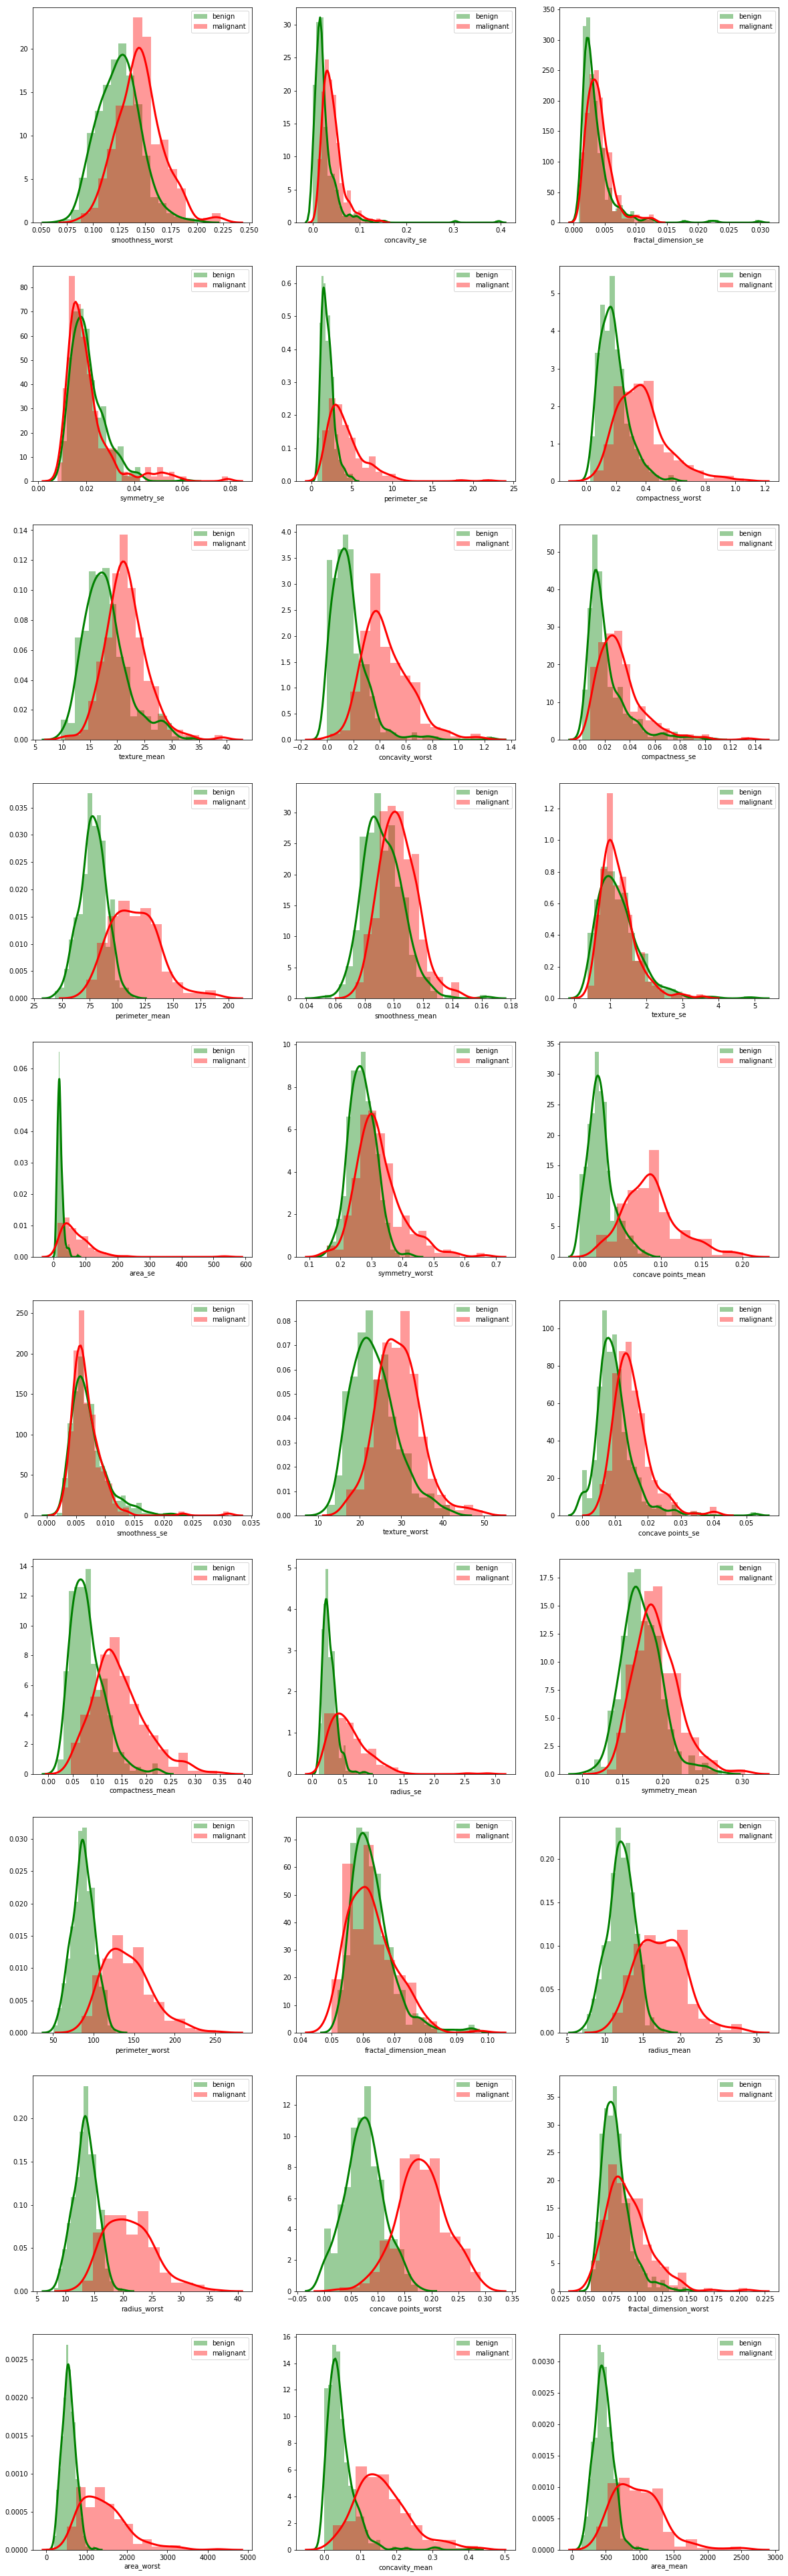

In [10]:
v = set(df.columns) - set(["diagnosis"])
fig, axs = plt.subplots(10, 3, figsize=(20, 70))
j = 0
for i in v:
    ax = axs[j//3,j%3]
    ax = sns.distplot(df.loc[df['diagnosis'] == 'B', i], color="g", label="benign", ax=ax, kde_kws={'linewidth':3})
    ax = sns.distplot(df.loc[df['diagnosis'] == 'M', i], color="r", label="malignant", ax=ax, kde_kws={'linewidth':3})
    ax.legend()
    j += 1

## Heatmap для матрицы корреляций

In [11]:
# Подсчет корреляции между колонками
Corr = df[v].corr()
Corr

smoothness_worst  concavity_se  fractal_dimension_se  \
smoothness_worst                 1.000000      0.168481              0.170568   
concavity_se                     0.168481      1.000000              0.727372   
fractal_dimension_se             0.170568      0.727372              1.000000   
symmetry_se                     -0.012662      0.309429              0.369078   
perimeter_se                     0.130054      0.362482              0.244143   
compactness_worst                0.568187      0.484858              0.390159   
texture_mean                     0.077503      0.143293              0.054458   
concavity_worst                  0.518523      0.662564              0.379975   
compactness_se                   0.227394      0.801268              0.803269   
perimeter_mean                   0.150549      0.228082             -0.005523   
smoothness_mean                  0.805324      0.248396              0.283607   
texture_se                      -0.073658      0.194998              0.279723   
area_se                          0.125389      0.270895              0.127071   
symmetry_worst                   0.493838      0.197788              0.111094   
concave points_mean              0.452753      0.439167              0.257584   
smoothness_se                    0.314457      0.268685              0.427374   
texture_worst                    0.225429      0.100241             -0.003195   
concave points_se                0.215351      0.771804              0.611044   
compactness_mean                 0.565541      0.570517              0.507318   
radius_se                        0.141919      0.332358              0.227754   
symmetry_mean                    0.426675      0.342627              0.331786   
perimeter_worst                  0.236775      0.226680             -0.001000   
fractal_dimension_mean           0.504942      0.446630              0.688132   
radius_mean                      0.119616      0.194204             -0.042641   
radius_worst                     0.216574      0.186904             -0.037488   
concave points_worst             0.547691      0.440472              0.215204   
fractal_dimension_worst          0.617624      0.439329              0.591328   
area_worst                       0.209145      0.188353             -0.022736   
concavity_mean                   0.448822      0.691270              0.449301   
area_mean                        0.123523      0.207660             -0.019887   

                         symmetry_se  perimeter_se  compactness_worst  \
smoothness_worst           -0.012662      0.130054           0.568187   
concavity_se                0.309429      0.362482           0.484858   
fractal_dimension_se        0.369078      0.244143           0.390159   
symmetry_se                 1.000000      0.266487           0.060255   
perimeter_se                0.266487      1.000000           0.341919   
compactness_worst           0.060255      0.341919           1.000000   
texture_mean                0.009127      0.281673           0.277830   
concavity_worst             0.037119      0.418899           0.892261   
compactness_se              0.394713      0.416322           0.678780   
perimeter_mean             -0.081629      0.693135           0.455774   
smoothness_mean             0.200774      0.296092           0.472468   
texture_se                  0.411621      0.223171          -0.092439   
area_se                     0.134109      0.937655           0.283257   
symmetry_worst              0.389402      0.109930           0.614441   
concave points_mean         0.095351      0.710650           0.667454   
smoothness_se               0.413506      0.151075          -0.055558   
texture_worst              -0.077473      0.200371           0.360832   
concave points_se           0.312780      0.556264           0.452888   
compactness_mean            0.229977      0.548905           0.865809   
radius_se                   0.240567      0.972794   

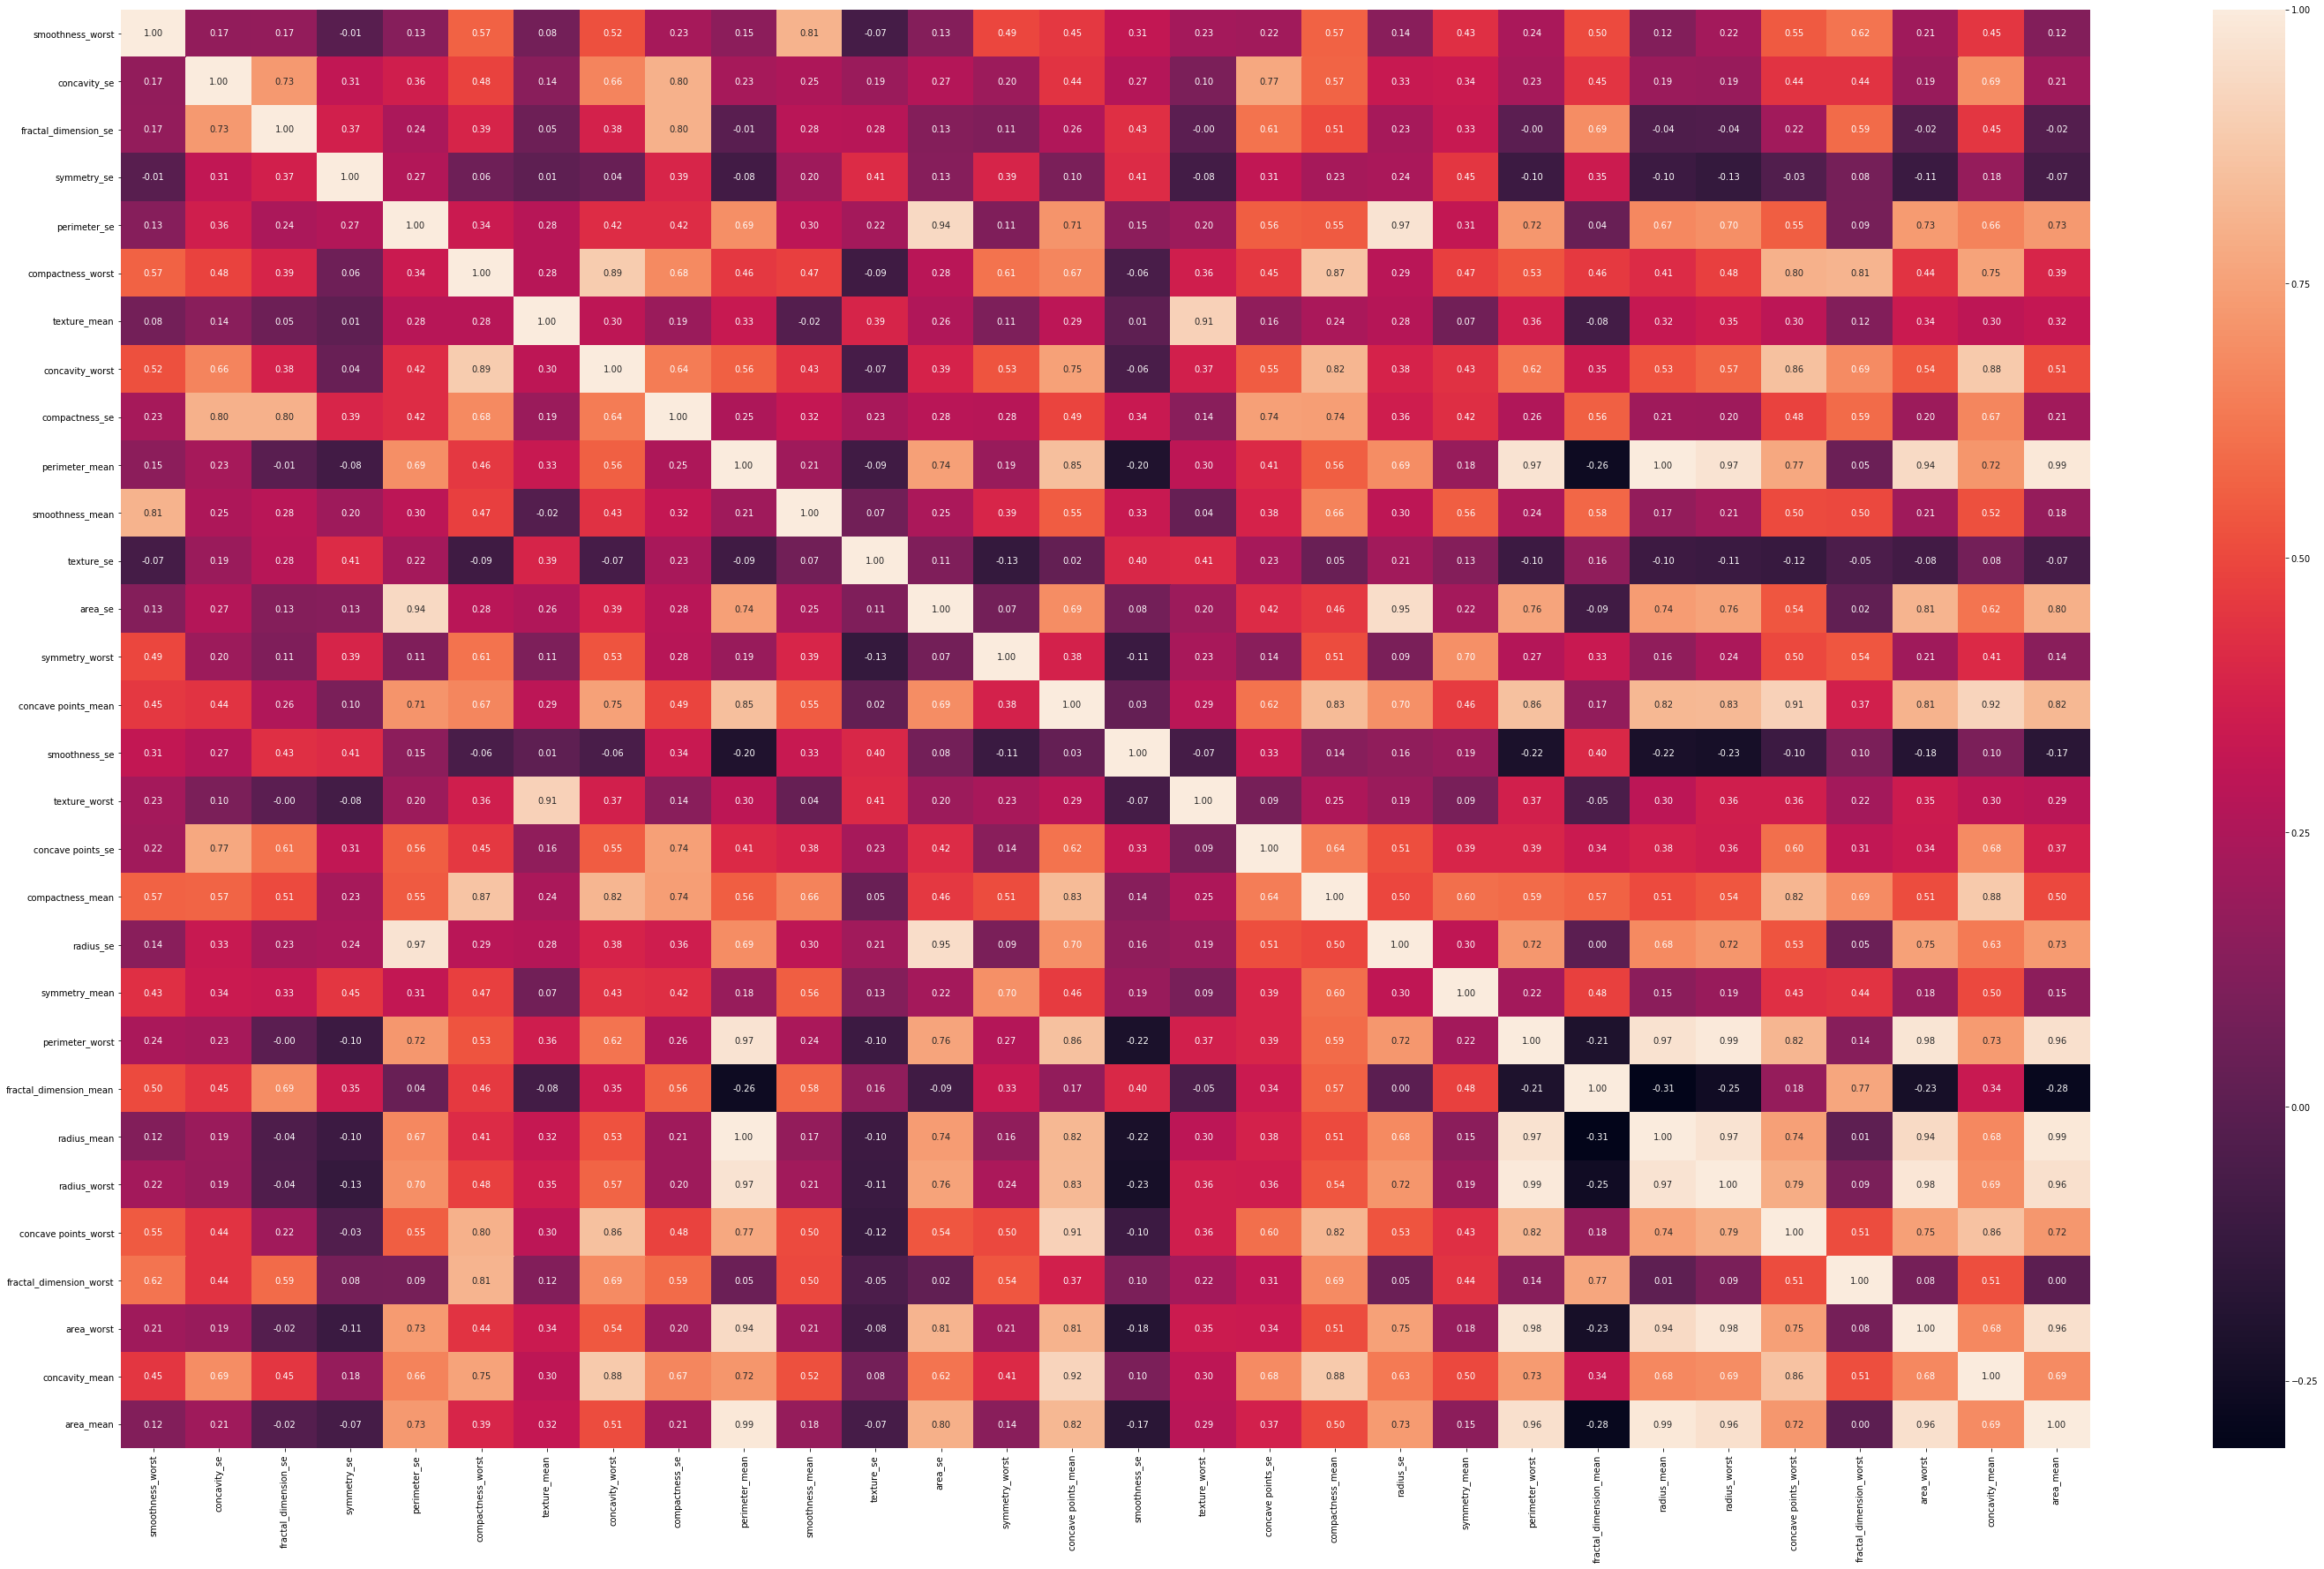

In [12]:
# Рисуем тепловую карту для корреляций
plt.figure(figsize=(50,30))
sns.heatmap(Corr, annot=True, fmt='.2f')
plt.show()

In [17]:
#Сильно скоррелированные признаки больше 0,85
CorField = list(combinations(Corr.columns, 2))
corr_pair = [(i[0], i[1], Corr.loc[i]) for i in CorField if Corr.loc[i] >= 0.85]
corr_pair

[('perimeter_se', 'area_se', 0.9376554069544158),
 ('perimeter_se', 'radius_se', 0.9727936770160752),
 ('compactness_worst', 'concavity_worst', 0.8922608987764692),
 ('compactness_worst', 'compactness_mean', 0.8658090398022638),
 ('texture_mean', 'texture_worst', 0.9120445888404215),
 ('concavity_worst', 'concave points_worst', 0.8554338603439984),
 ('concavity_worst', 'concavity_mean', 0.8841026390943831),
 ('perimeter_mean', 'concave points_mean', 0.8509770412528199),
 ('perimeter_mean', 'perimeter_worst', 0.9703868870426388),
 ('perimeter_mean', 'radius_mean', 0.9978552814938113),
 ('perimeter_mean', 'radius_worst', 0.9694763634663142),
 ('perimeter_mean', 'area_worst', 0.9415498080023057),
 ('perimeter_mean', 'area_mean', 0.9865068039913906),
 ('area_se', 'radius_se', 0.95183011211099),
 ('concave points_mean', 'perimeter_worst', 0.8559231281343112),
 ('concave points_mean', 'concave points_worst', 0.9101553142985934),
 ('concave points_mean', 'concavity_mean', 0.9213910263788594),

In [20]:
feature_remove = set([i[0] for i in corr_pair])
feature_remove

{'area_se',
 'area_worst',
 'compactness_mean',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_worst',
 'texture_mean'}

In [23]:
df = df[set(df.columns) - feature_remove]

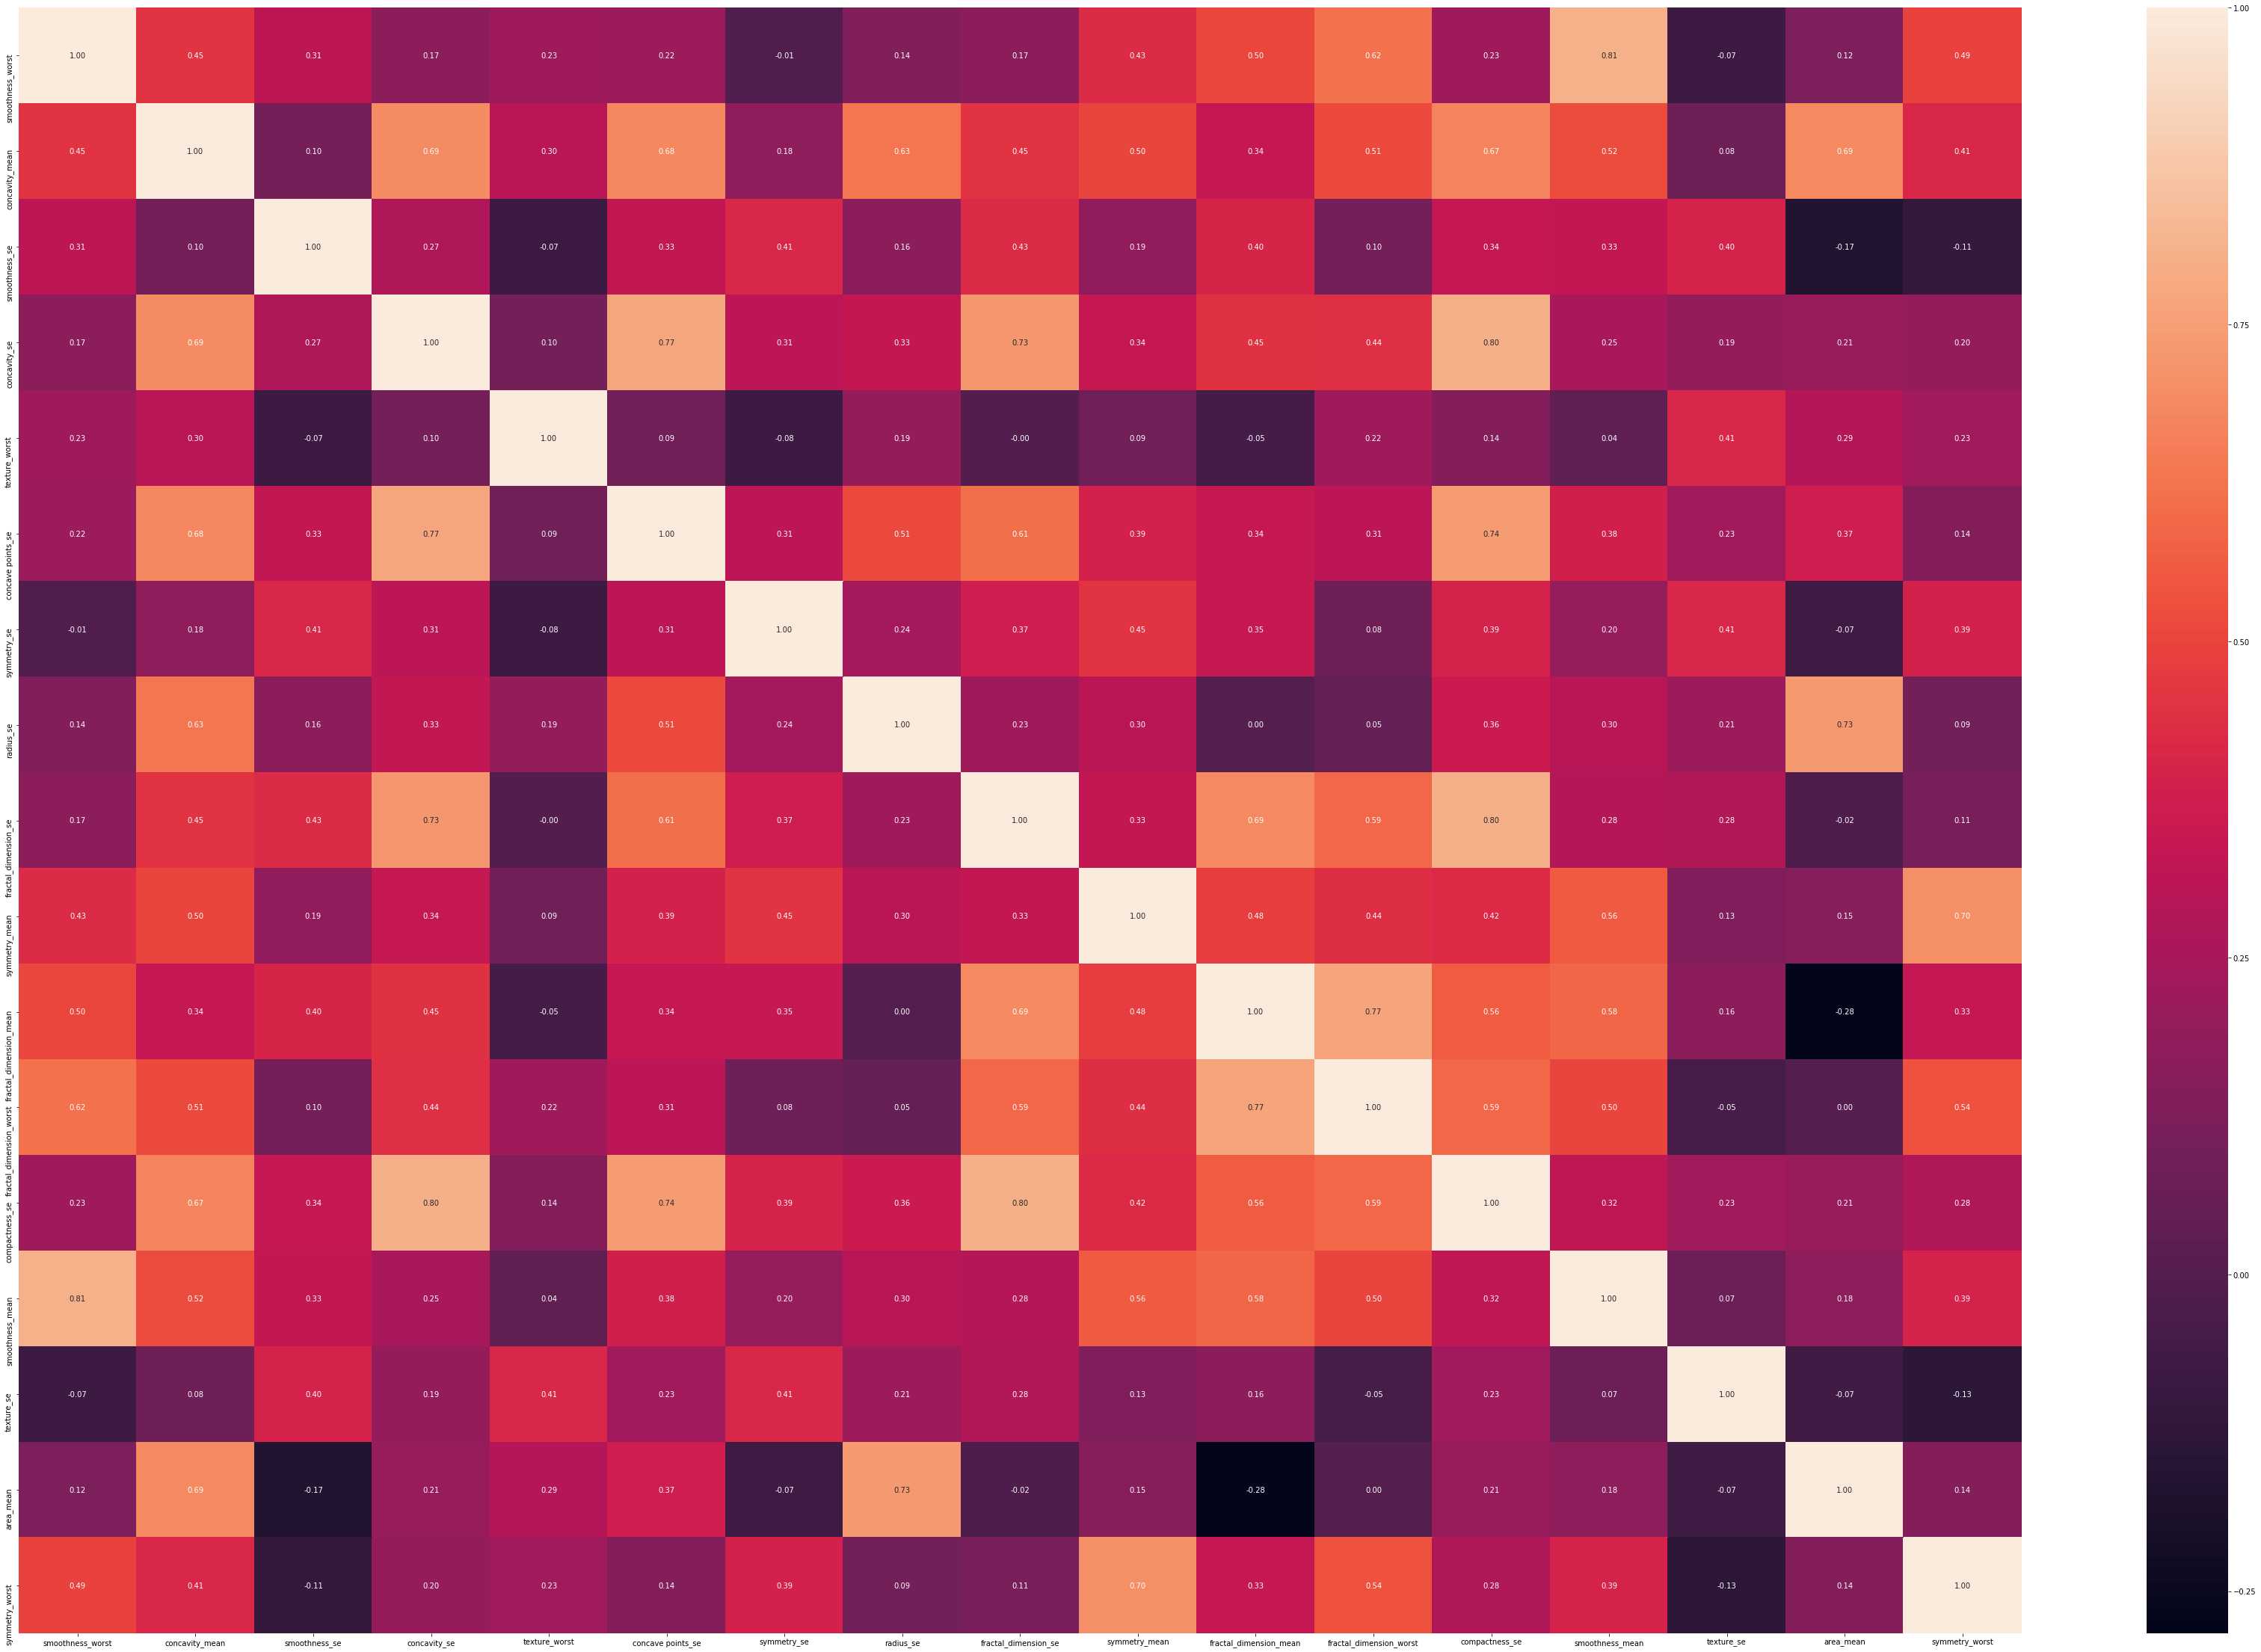

In [27]:
# Рисуем тепловую карту для корреляций
Corr = df.corr()
plt.figure(figsize=(60,40))
sns.heatmap(Corr, annot=True, fmt='.2f')
plt.show()

In [26]:
#Сильно скоррелированные признаки больше 0,85
CorField = list(combinations(Corr.columns, 2))
corr_pair = [(i[0], i[1], Corr.loc[i]) for i in CorField if Corr.loc[i] >= 0.85]
corr_pair

[]

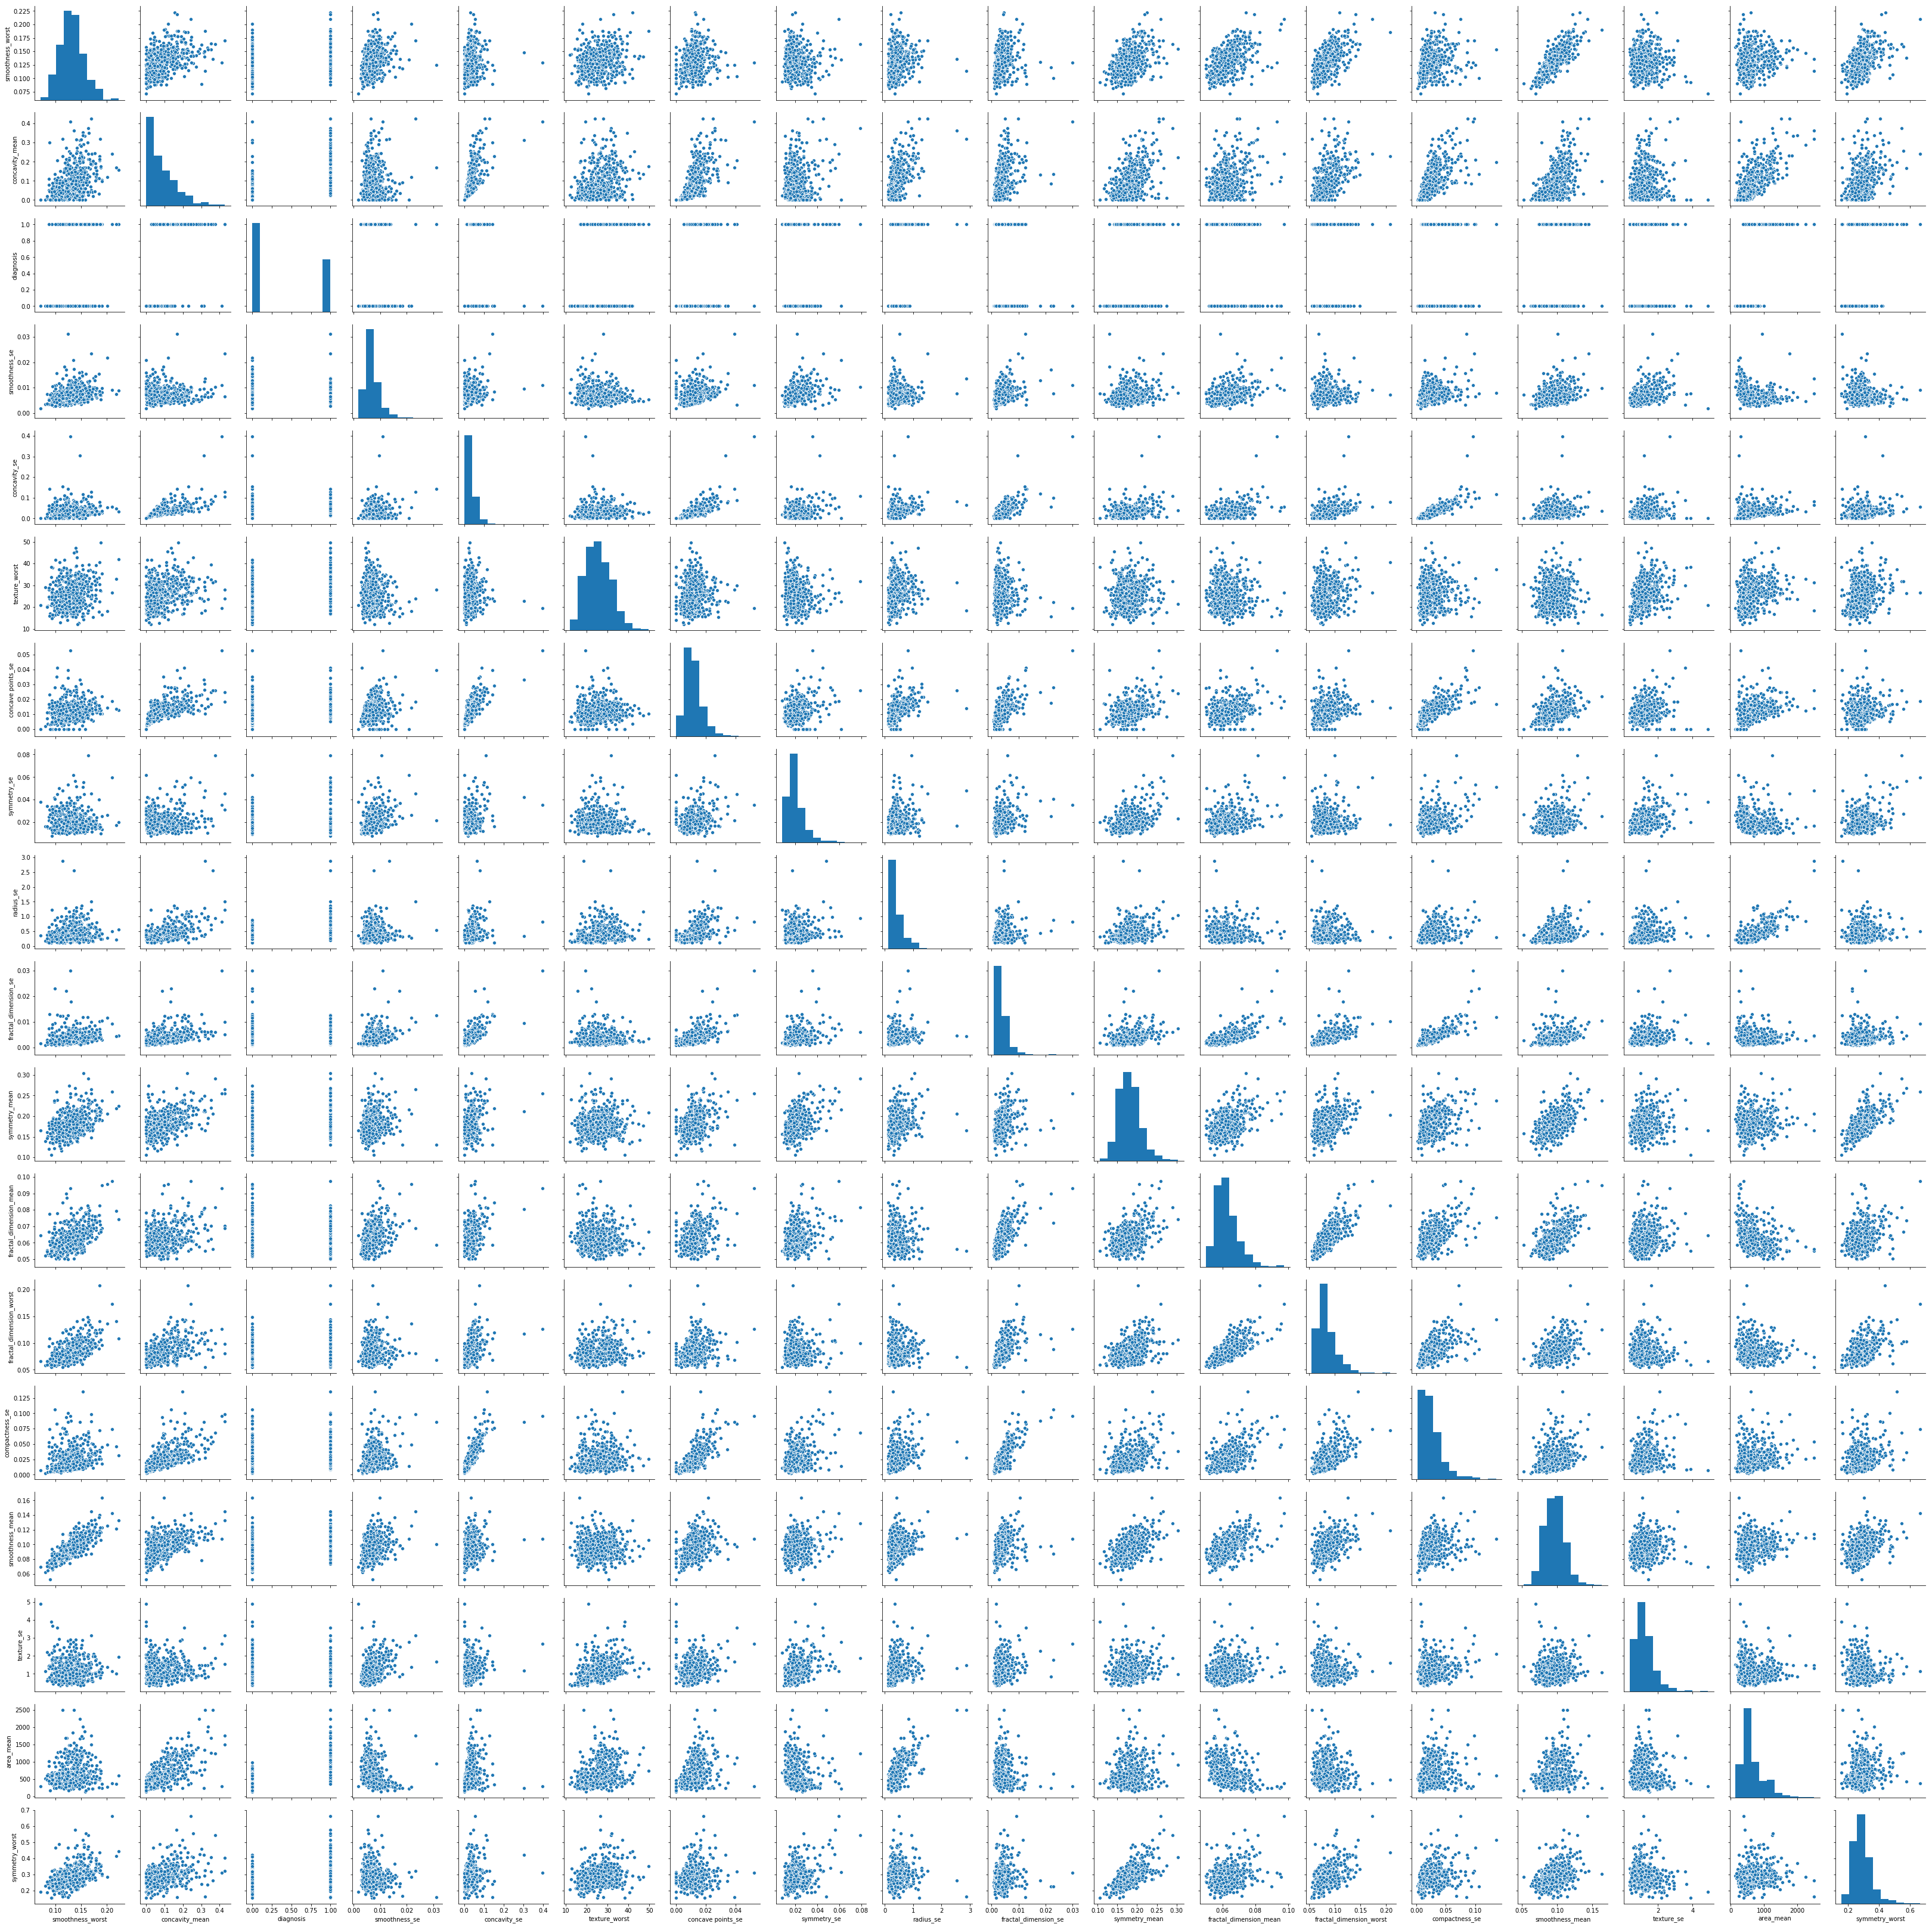

In [35]:
sns.pairplot(df)
plt.show()

In [28]:
# Перекодируем целевую перменную
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == "M" else 0)

In [39]:
# Разделим датафрейм на тренировочную и тестовую выборки 70/30
df_train, df_test = train_test_split(df, test_size = 0.3)

In [40]:
scaler = StandardScaler()
v = list(set(df.columns) - set(["diagnosis"]))
scaler.fit(df_train[v])

df_train_scale = scaler.transform(df_train[v])

df_test_scale = scaler.transform(df_test[v])

df_train[v] = df_train_scale
df_test[v] = df_test_scale

C:\Users\rusak\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\rusak\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\rusak\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [41]:
df_train.head()

smoothness_worst  concavity_mean  diagnosis  smoothness_se  concavity_se  \
235         -0.144297       -0.948822          0       0.113496     -0.826459   
364         -0.467947       -0.858681          0      -0.867043     -0.589699   
3            3.402738        1.894314          1       0.676938      0.793152   
94           1.010349        0.999173          1       0.722773      0.532348   
568         -1.838651       -1.132113          0       0.048018     -1.066306   

     texture_worst  concave points_se  symmetry_se  radius_se  \
235       0.782322          -0.315584    -0.952748  -0.541851   
364      -0.637913          -1.026088    -0.920307  -0.922553   
3         0.156624           1.030258     4.492729   0.354787   
94       -0.219126           1.005306    -0.680474   0.283571   
568       0.797219          -1.881313     0.684371  -0.061523   

     fractal_dimension_se  symmetry_mean  fractal_dimension_mean  \
235             -0.330966      -1.078017               -0.619506   
364             -0.639550      -0.600156               -0.805951   
3                1.947332       2.802357                4.819421   
94              -0.115212       0.136396                0.005226   
568             -0.382457      -0.826511               -0.551328   

     fractal_dimension_worst  compactness_se  smoothness_mean  texture_se  \
235                -0.421819       -0.668249        -0.385501    0.529831   
364                -0.441047       -0.740522        -1.188635   -1.073554   
3                   4.897695        2.632952         3.286378   -0.094888   
94                 -0.082860        0.598977         0.550190   -0.439833   
568                -0.739353       -1.166554        -3.084118    0.394806   

     area_mean  symmetry_worst  
235  -0.154588       -1.088162  
364  -0.302852       -0.274015  
3    -0.786310        5.886632  
94    0.142522       -0.126994  
568  -1.382566       -0.068502

In [42]:
y_train = df_train['diagnosis']
y_test = df_test['diagnosis']

X_train = df_train.drop('diagnosis', axis=1)
X_test = df_test.drop('diagnosis', axis=1)

In [43]:
# функция для расчета метрик
def print_metrics(y_test,y_pred):
    print('accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('precision:', metrics.precision_score(y_test, y_pred))
    print('recall:', metrics.recall_score(y_test, y_pred))
    print('f1:', metrics.f1_score(y_test, y_pred))
    print('roc_auc:', metrics.roc_auc_score(y_test, y_pred))

In [46]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.predict_proba(X_test)

array([[4.87854171e-03, 9.95121458e-01],
       [9.99980923e-01, 1.90769198e-05],
       [3.68496373e-06, 9.99996315e-01],
       [1.91680284e-02, 9.80831972e-01],
       [9.99095512e-01, 9.04488037e-04],
       [9.99982003e-01, 1.79970893e-05],
       [1.04365779e-02, 9.89563422e-01],
       [9.95694492e-01, 4.30550754e-03],
       [1.14468733e-07, 9.99999886e-01],
       [9.98758517e-01, 1.24148268e-03],
       [5.07519625e-06, 9.99994925e-01],
       [9.99560938e-01, 4.39061520e-04],
       [9.83411063e-01, 1.65889369e-02],
       [9.82689897e-01, 1.73101028e-02],
       [2.95195824e-02, 9.70480418e-01],
       [9.97491917e-01, 2.50808257e-03],
       [9.99160864e-01, 8.39136056e-04],
       [9.96939096e-01, 3.06090398e-03],
       [8.84508838e-01, 1.15491162e-01],
       [9.99796225e-01, 2.03774809e-04],
       [9.74367162e-01, 2.56328384e-02],
       [9.99851211e-01, 1.48789067e-04],
       [9.43100513e-01, 5.68994867e-02],
       [4.45112374e-07, 9.99999555e-01],
       [3.545640

In [51]:
print_metrics(y_test, LR.predict(X_test))

accuracy: 0.9824561403508771
precision: 0.9692307692307692
recall: 0.984375
f1: 0.9767441860465116
roc_auc: 0.9828417056074766


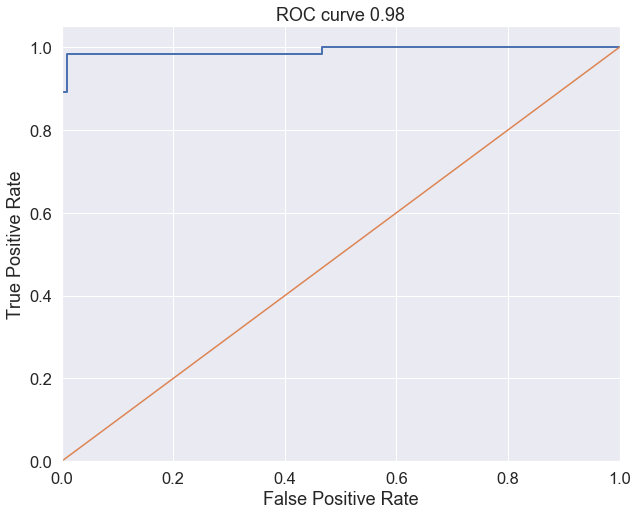

In [64]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, LR.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve {}'.format(np.round(metrics.roc_auc_score(y_test, LR.predict(X_test)),2)))
plt.show()